<a href="https://colab.research.google.com/github/Krocata613020188-1/Project/blob/main/Cloud_DB_and_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install azure-data-tables


     |████████████████████████████████| 108 kB 7.3 MB/s 
     |████████████████████████████████| 178 kB 49.4 MB/s 
     |████████████████████████████████| 85 kB 3.8 MB/s 
     |████████████████████████████████| 41 kB 567 kB/s 


# Azure Table (Cloud DB)

1.create DB on Azure Portal
2.insert data
3.query data

In [2]:
from azure.data.tables import TableServiceClient
from azure.data.tables import TableEntity

In [4]:
table_service = TableServiceClient.from_connection_string(conn_str='DefaultEndpointsProtocol=https;AccountName=aiprototypekro;AccountKey=vVmv7FsmO5m7wbcLpliglfumlA3DQUC1Ug9sgCLx8a8mSLvssxlrH4fM6OZAGuWJjtLy3T1tOiiCfatssW7yHg==;EndpointSuffix=core.windows.net')

# insert data


In [5]:
table_client = table_service.get_table_client(table_name="testdb")

### insert by pre-create entity

In [6]:
task = TableEntity()
task[u'PartitionKey'] = u'part1'
task[u'RowKey'] = u'001'
task[u'name'] = u'stat'
task[u'age'] = 30
table_client.create_entity(task)

{'date': datetime.datetime(2022, 2, 8, 2, 46, 24, tzinfo=datetime.timezone.utc),
 'etag': 'W/"datetime\'2022-02-08T02%3A46%3A25.6457814Z\'"',
 'version': '2019-02-02'}

### insert by dictionary

In [7]:

task = {u'PartitionKey': u'part1', u'RowKey': u'002',
        u'name': u'python', u'room': 'online',u'age':3}
table_client.create_entity(entity=task)

{'date': datetime.datetime(2022, 2, 8, 2, 49, 28, tzinfo=datetime.timezone.utc),
 'etag': 'W/"datetime\'2022-02-08T02%3A49%3A29.0582323Z\'"',
 'version': '2019-02-02'}

# query

### query by partitionkey&rowkey (เลือกข้อมูล)

In [ ]:
table_client = table_service.get_table_client(table_name="testdb")

In [9]:
task = table_client.get_entity('part1', '002')
print(task)


{'PartitionKey': 'part1', 'RowKey': '002', 'name': 'python', 'room': 'online', 'age': 3}


In [10]:
for i in range(10):
  task = {u'PartitionKey': u'partQ', u'RowKey': f'00{i+10}',
          u'name': u'python', u'room': 'online',u'age':i}
  table_client.create_entity(entity=task)


### query by partitionkey&rowkey

In [13]:
tasks = table_client.query_entities(query_filter="age gt 6")
print(tasks)


<iterator object azure.core.paging.ItemPaged at 0x7f08a40610d0>


In [14]:
for t in tasks:
  print(t)

{'PartitionKey': 'part1', 'RowKey': '001', 'name': 'stat', 'age': 30}
{'PartitionKey': 'partQ', 'RowKey': '0017', 'name': 'python', 'room': 'online', 'age': 7}
{'PartitionKey': 'partQ', 'RowKey': '0018', 'name': 'python', 'room': 'online', 'age': 8}
{'PartitionKey': 'partQ', 'RowKey': '0019', 'name': 'python', 'room': 'online', 'age': 9}


# Cloud AI

In [15]:
!pip install azure-cognitiveservices-vision-computervision

In [17]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials



credentials = CognitiveServicesCredentials('182110d3bf9449ae9396030874f29719')
client = ComputerVisionClient(
    endpoint="https://southeastasia.api.cognitive.microsoft.com/",
    credentials=credentials
)

In [36]:
url = "https://aiprototypekro.blob.core.windows.net/pics/47285548_1928634140525243_5579791167572148224_n.jpg"

image_analysis = client.analyze_image(url,visual_features=[VisualFeatureTypes.faces])

for tag in image_analysis.faces:
    print(tag)

{'additional_properties': {}, 'age': 20, 'gender': <Gender.male: 'Male'>, 'face_rectangle': <azure.cognitiveservices.vision.computervision.models._models_py3.FaceRectangle object at 0x7f0898ccb1d0>}


In [22]:
print(tag.face_rectangle.height,tag.face_rectangle.width,tag.face_rectangle.top,tag.face_rectangle.left)

154 154 66 396


In [37]:
url = "https://aiprototypekro.blob.core.windows.net/pics/47285548_1928634140525243_5579791167572148224_n.jpg"

image_analysis = client.analyze_image(url,visual_features=[VisualFeatureTypes.description])



In [38]:
for each_cap in image_analysis.description.captions:
    print(each_cap)

{'additional_properties': {}, 'text': 'a person holding a peace sign', 'confidence': 0.3889528214931488}


In [23]:
import cv2

In [24]:
from matplotlib import pyplot as plt

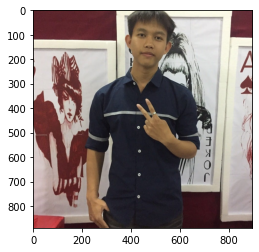

In [27]:
img = cv2.imread('/content/47285548_1928634140525243_5579791167572148224_n.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [33]:
img2 = cv2.rectangle(img,(tag.face_rectangle.left,tag.face_rectangle.top),
                   (tag.face_rectangle.left+tag.face_rectangle.width,tag.face_rectangle.top+tag.face_rectangle.height),(0,0,255),5)

20
Gender.male


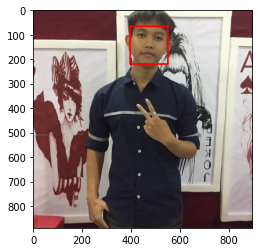

In [34]:
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
print(tag.age)
print(tag.gender)